# Diving into the Julia Interpolations Package

The interpolations package implements a variety of interpolation techniques for Julia that support cubic, linear, quadratic, and many more functions. This package best supports cardinal B-spline interpolation. B-splines are used for interpolating polynomial functions which are fit to the data and to each other. The interpolations package is also utilized by several other packages, the most popular two being gadfly and makie. If any images/graphs do not appear in this notebook, then refer to the separate images attached in the github repo.

The interpolations package is general purpose software for the Julia language.

This package is open source. There are several contributors who are constantly modifying the package and anyone is welcome to help enhance it or utilize the current available tools. Interpolations is constantly improving on github. Interpolations is a very common package within the Julia language and is therefore used by anyone. 

Depending on the problem, the amount of conditioning that goes into it determines the accuracy and stability of the algorithm. In an example we look at later using heatmaps, we see that more conditioning results in more accuracy and a more stable manner to solve the problem. The changes made using interpolation are not quite small and that affects the output (making the graph look less pixelated and more smooth). This could be an example of a well-conditioned problem.

## Code Examples

In [1]:
nx = 10
f(x) = sin(2pi/(nx-1) * (x-1))

xcoarse = 1:nx
ycoarse = f.(xcoarse);

xfine = 1:0.1:xcoarse[end]
yfine = f.(xfine);

In [2]:
using Interpolations

yitp = interpolate(ycoarse, BSpline(Linear()))

10-element interpolate(::Vector{Float64}, BSpline(Linear())) with element type Float64:
  0.0
  0.6427876096865393
  0.984807753012208
  0.8660254037844387
  0.3420201433256689
 -0.34202014332566866
 -0.8660254037844385
 -0.9848077530122081
 -0.6427876096865396
 -2.4492935982947064e-16

In [3]:
yitp_const = interpolate(ycoarse, BSpline(Constant()))
yconst = [yitp_const(x) for x in xfine]

yitp_linear = interpolate(ycoarse, BSpline(Linear()))
ylinear = [yitp_linear(x) for x in xfine]

yitp_quadratic = interpolate(ycoarse, BSpline(Quadratic(Line(OnCell()))))
yquadratic = [yitp_quadratic(x) for x in xfine];

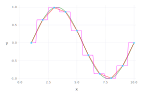

In [4]:
using Gadfly

plot(
    layer(x=xcoarse,y=ycoarse,Geom.point),
    layer(x=xfine,y=yconst,Geom.line,Theme(default_color=colorant"magenta")),
    layer(x=xfine,y=ylinear,Geom.line,Theme(default_color=colorant"red")),
    layer(x=xfine,y=yquadratic,Geom.line,Theme(default_color=colorant"green"))
)

The above plot uses the Gadfly library. Gadfly is a system for plotting and visualization written in Julia. It is the most popular library that uses the interpolations package. 

Another library that I find more interesting to explore and one that utilizes the interpolations package is makie. Makie is another form of data visualization with high performance and extensibility. It is the second most popular library that uses the interpolations package. We can make standard plots using GLMakie such as the one below. 

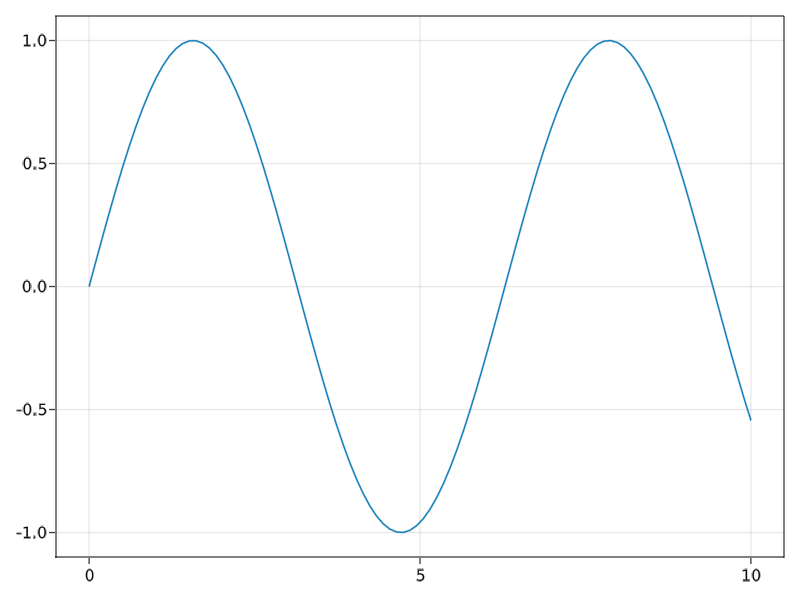

In [5]:
using GLMakie

x = range(0, 10, length=100)
y = sin.(x)
lines(x, y)

Using CairoMakie and Plots, we can create heatmaps which is a very interesting way to visualize data. Plotting heatmaps require the use of interpolation. Heatmaps represent data values in the form of colors. A lot of times, they are used to depict user behavior on web pages. 

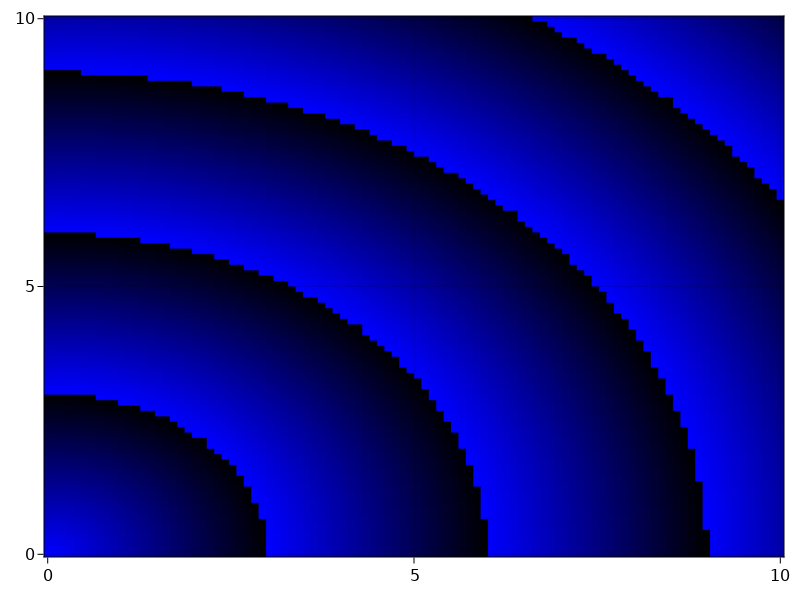

In [6]:
using CairoMakie, Plots

xs = LinRange(0, 10, 100)
ys = LinRange(0,10, 100)
zs = [x+im*y for x in xs, y in ys]
rings = abs.(zs) .% 3

fig = Figure();
ax1 = fig[1, 1] = Axis( fig, backgroundcolor="blue");
# ax2 = fig[2, 1] = Axis( fig, backgroundcolor="blue");

cmblack = cgrad(range(HSLA(0,0,0,0), stop=HSLA(0,0,0,1), length=100));
CairoMakie.heatmap!(ax1, xs, ys, rings, colormap=cmblack, interpolate=true);

# cmwhite = cgrad(range(HSLA(0,0,1,0), stop=HSLA(0,0,1,1), length=100));
# CairoMakie.heatmap!(ax2, xs, ys, rings, colormap=cmwhite, interpolate=true);

fig

In general, proper interpolation should yield a heatmap that is smooth all across without too much pixelation. The bottom shows an example when interpolation is used and one when it is not.

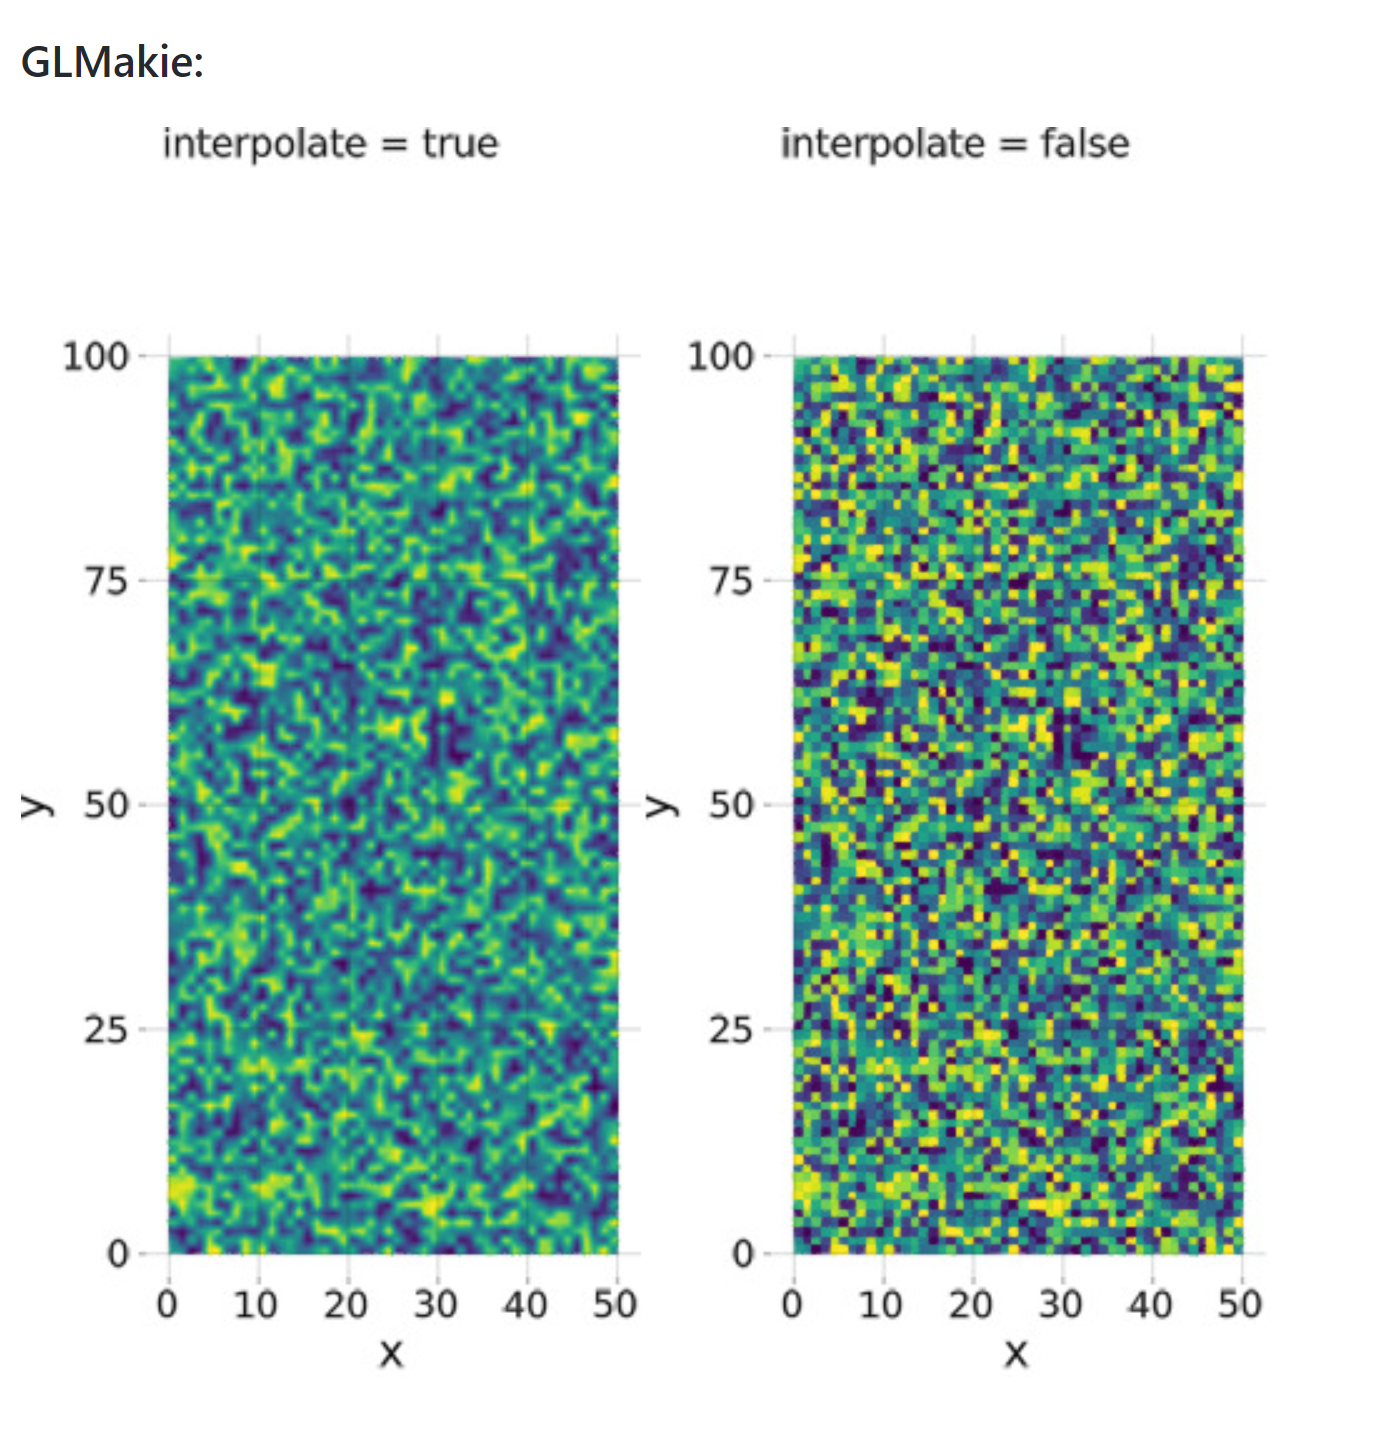

## Questions 

One question I had was how would different interpolation methods defined in this package affect the accuracy of heatmap data.

## Experiment

Because this package is said to better support B-spline interpolation, it would be interesting to see how B-spline interpolation specifically is used in other forms and libraries of data visualization (like in Makie).